# Why people leave their current positions? _[Dataset](https://www.kaggle.com/ludobenistant/hr-analytics)_
# What can employers do to keep their employees stay?

### About this notebook

In previous work, we explored dataset based on multiple graphs. And we also created new features to make better prediction. In this notebook, classification algorithms will be applied to predict which employee is leaving

#### Importing necessary libraries

In [88]:
import numpy as np
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display
from sklearn.preprocessing import scale, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from scikitplot.plotters import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

#### Loading dataset

In [4]:
%run load.py
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,avg_hour_project
0,0.0,0.0,2,0,3,0,1,0,0,0,1.0
1,2.0,2.0,5,2,6,0,1,0,0,1,0.0
2,0.0,2.0,7,2,4,0,1,0,0,1,0.0
3,2.0,2.0,5,1,5,0,1,0,0,0,0.0
4,0.0,0.0,2,0,3,0,1,0,0,0,1.0


In [7]:
labels = data.left
ml_data = data.drop('left', axis = 1)

#### Spliting dataset into training and test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(ml_data, labels, test_size = 0.2, random_state = 25)

# Classification Models

### Model: Logistic Regression

In [92]:
lgr = LogisticRegression(random_state = 42)
lgr.fit(X_train, y_train)
train_score_lgr = lgr.score(X_train, y_train)
test_score_lgr = lgr.score(X_test, y_test)
print("Training score: {:.5f}".format(train_score_lgr))
print("Test score: {:.5f}".format(test_score_lgr))

Training score: 0.76372
Test score: 0.76410


#### Plot ROC Curves of Logistic Regression

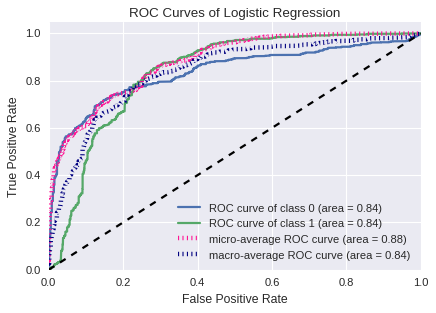

In [98]:
_ = plot_roc_curve(y_test, lgr.predict_proba(X_test))
_ = plt.title('ROC Curves of Logistic Regression')

### Model: k-Nearest-Neighbors

In [96]:
knn = KNeighborsClassifier(n_neighbors=2)
parameters = {'n_neighbors':[2,3,4,5,6,7,8,9,10], 'leaf_size':[20,30,40]}
clf = GridSearchCV(knn, parameters, cv = 5)
clf.fit(X_train, y_train)
train_score_knn = clf.score(X_train, y_train)
test_score_knn = clf.score(X_test, y_test)
print("Training score: {:.5f}".format(train_score_knn))
print("Test score: {:.5f}".format(test_score_knn))

Training score: 0.97427
Test score: 0.95316


#### Plot ROC Curves of k-Nearest-Neighbors

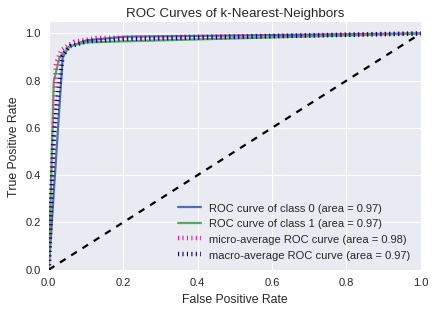

In [97]:
_ = plot_roc_curve(y_test, clf.predict_proba(X_test))
_ = plt.title('ROC Curves of k-Nearest-Neighbors')

### Model: Support Vector Machine

In [99]:
svm = SVC()
parameters = {'kernel': ('linear', 'rbf', 'sigmoid', 'poly')}
clf = GridSearchCV(svm, parameters, cv = 5)
clf.fit(X_train, y_train)
train_score_svm = clf.score(X_train, y_train)
test_score_svm = clf.score(X_test, y_test)
print("Training score: {:.5f}".format(train_score_svm))
print("Test score: {:.5f}".format(test_score_svm))

Training score: 0.96632
Test score: 0.96137


### Model: Decision Tree

In [101]:
dt = DecisionTreeClassifier()
parameters = {'criterion':['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2', None]}
clf = GridSearchCV(dt, parameters, cv = 5)
clf.fit(X_train, y_train)
train_score_dt = clf.score(X_train, y_train)
test_score_dt = clf.score(X_test, y_test)
print("Training score: {:.5f}".format(train_score_dt))
print("Test score: {:.5f}".format(test_score_dt))

Training score: 0.99068
Test score: 0.96547


#### Plot ROC Curves of Decision Tree

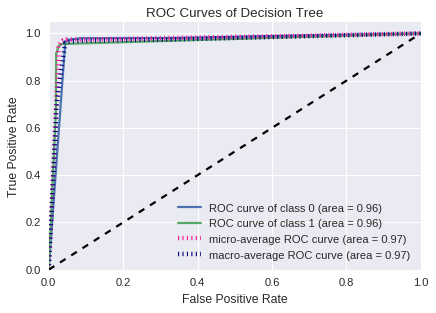

In [102]:
_ = plot_roc_curve(y_test, clf.predict_proba(X_test))
_ = plt.title('ROC Curves of Decision Tree')

### Model: Random Forest

In [103]:
rfc = RandomForestClassifier()
parameters = {'criterion': ['gini', 'entropy'], 'n_estimators': range(5,15),
              'max_features': ['auto', 'sqrt', 'log2', None],
              'bootstrap': [True, False], 'warm_start': [True, False]}
clf = GridSearchCV(rfc, parameters, cv = 5)
clf.fit(X_train, y_train)
train_score_rfc = clf.score(X_train, y_train)
test_score_rfc = clf.score(X_test, y_test)
print("Training score: {:.5f}".format(train_score_rfc))
print("Test score: {:.5f}".format(test_score_rfc))

Training score: 0.98983
Test score: 0.97094


#### Plot ROC Curves of Random Forest

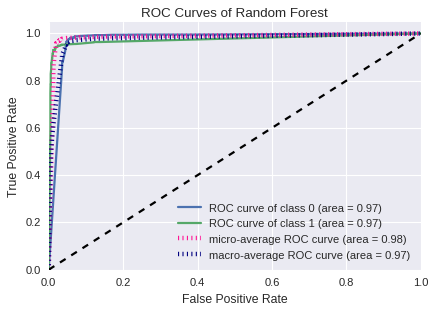

In [104]:
_ = plot_roc_curve(y_test, clf.predict_proba(X_test))
_ = plt.title('ROC Curves of Random Forest')

### Model: AdaBoost

In [105]:
adb = AdaBoostClassifier()
parameters = {'n_estimators': range(30, 60), 'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 'algorithm': ['SAMME', 'SAMME.R']}
clf = GridSearchCV(adb, parameters, cv = 5)
clf.fit(X_train, y_train)
train_score_adb = clf.score(X_train, y_train)
test_score_adb = clf.score(X_test, y_test)
print("Training score: {:.5f}".format(train_score_adb))
print("Test score: {:.5f}".format(test_score_adb))

Training score: 0.91717
Test score: 0.91282


#### Plot ROC Curves of AdaBoost

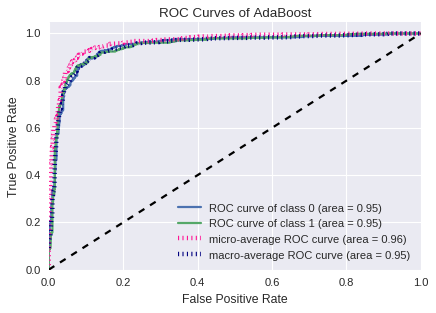

In [106]:
_ = plot_roc_curve(y_test, clf.predict_proba(X_test))
_ = plt.title('ROC Curves of AdaBoost')

### Model: Bagging

In [107]:
bgc = BaggingClassifier()
parameters = {'n_estimators': range(5,15),'bootstrap': [True, False], 'warm_start': [True, False]}
clf = GridSearchCV(bgc, parameters, cv = 5)
clf.fit(X_train, y_train)
train_score_bgc = clf.score(X_train, y_train)
test_score_bgc = clf.score(X_test, y_test)
print("Training score: {:.5f}".format(train_score_bgc))
print("Test score: {:.5f}".format(test_score_bgc))

Training score: 0.99000
Test score: 0.96957


#### Plot ROC Curves of Bagging

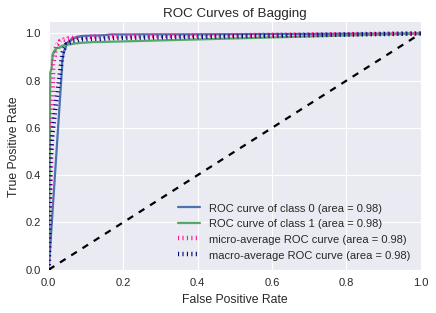

In [108]:
_ = plot_roc_curve(y_test, clf.predict_proba(X_test))
_ = plt.title('ROC Curves of Bagging')

### Combine all the results together in one chart

In [87]:
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'SVM', 'kNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Bagging'],
        'Training_Score' : [train_score_lgr, train_score_svm, train_score_knn, train_score_dt, train_score_rfc, train_score_adb, train_score_bgc],
        'Testing_Score'  : [test_score_lgr, test_score_svm, test_score_knn, test_score_dt, test_score_rfc, test_score_adb, test_score_bgc]
    })
models.sort_values(by='Testing_Score', ascending=False)

,Model,Testing_Score,Training_Score
4,Random Forest,0.973333,0.989742
6,Bagging,0.970598,0.989400
3,Decision Tree,0.965128,0.990682
1,SVM,0.961368,0.966319
2,kNN,0.953162,0.974269
5,AdaBoost,0.912821,0.917165
0,Logistic Regression,0.764103,0.763720


## Final Thoughts:

* Logistic Regression is one of the basic classification models that usually be used first to see the results;
* Random Forest performs best among all the classification models;
* Bagging model has really close score to random forest model (both training and test)
* The scores and ROC curves indicate that all the models (except logistic regression) did a excellent job in predicting.